In [ ]:
! pip install transformers -q

In [ ]:
from transformers import pipeline


In [ ]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [ ]:
emotion_labels = emotion("I love messing with yo mind!!")


In [ ]:
emotion_labels

[{'label': 'love', 'score': 0.7811968326568604}]

In [ ]:
emotion_labels[0]['label']

'love'

In [ ]:
import pandas as pd

In [ ]:
large_text = pd.read_excel('CSCA08_Fall_2016.xlsx', sheet_name='Sheet')

In [ ]:
large_text.shape

(11876, 8)

In [ ]:
large_text.head()

,title,content,type,name,datetime,thread_id,views,directory
0,Assignment 2 Special Re-Mark Request,Assignment 2 Special Re-Mark RequestA lot of p...,post,Brian Harrington,2016-12-13T15:49:11.000Z,@2698,486,assignment_2
1,Assignment 2 Special Re-Mark Request,Can we also add a line? or just replace,followup,Dharmik Shah,2016-12-13T15:05:16.000Z,@2698_f1,486,assignment_2
2,Assignment 2 Special Re-Mark Request,Yes. If you want to insert a line after the 40...,sub_followup,Brian Harrington,2016-12-13T15:47:57.000Z,@2698_f1,486,assignment_2
3,Assignment 2 Special Re-Mark Request,Okay and if im in a function (so code is inden...,sub_followup,Dharmik Shah (Anon. Poet to classmates),2016-12-13T15:56:52.000Z,@2698_f1,486,assignment_2
4,Assignment 2 Special Re-Mark Request,"That looks right, just make sure you're using ...",sub_followup,Brian Harrington,2016-12-13T18:40:59.000Z,@2698_f1,486,assignment_2


In [ ]:
large_text['content'][1:10].apply(emotion)

1    [{'label': 'curiosity', 'score': 0.94933122396...
2    [{'label': 'neutral', 'score': 0.9846389889717...
3    [{'label': 'approval', 'score': 0.599755287170...
4    [{'label': 'approval', 'score': 0.861104846000...
5    [{'label': 'neutral', 'score': 0.8391159176826...
6    [{'label': 'approval', 'score': 0.948941290378...
7    [{'label': 'curiosity', 'score': 0.50775474309...
8    [{'label': 'neutral', 'score': 0.3761585950851...
9    [{'label': 'curiosity', 'score': 0.87034374475...
Name: content, dtype: object

In [ ]:
def get_emotion_label(text):
  text = str(text)
  return(emotion(text[:512] if len(text)>512 else text)[0]['label'])

In [ ]:
get_emotion_label("from whatever is input to the function")

'neutral'

In [ ]:
large_text['emotion'] = large_text['content'].apply(get_emotion_label)

In [ ]:
large_text

,title,content,type,name,datetime,thread_id,views,directory,emotion
0,Assignment 2 Special Re-Mark Request,Assignment 2 Special Re-Mark RequestA lot of p...,post,Brian Harrington,2016-12-13T15:49:11.000Z,@2698,486,assignment_2,approval
1,Assignment 2 Special Re-Mark Request,Can we also add a line? or just replace,followup,Dharmik Shah,2016-12-13T15:05:16.000Z,@2698_f1,486,assignment_2,curiosity
2,Assignment 2 Special Re-Mark Request,Yes. If you want to insert a line after the 40...,sub_followup,Brian Harrington,2016-12-13T15:47:57.000Z,@2698_f1,486,assignment_2,neutral
3,Assignment 2 Special Re-Mark Request,Okay and if im in a function (so code is inden...,sub_followup,Dharmik Shah (Anon. Poet to classmates),2016-12-13T15:56:52.000Z,@2698_f1,486,assignment_2,approval
4,Assignment 2 Special Re-Mark Request,"That looks right, just make sure you're using ...",sub_followup,Brian Harrington,2016-12-13T18:40:59.000Z,@2698_f1,486,assignment_2,approval
...,...,...,...,...,...,...,...,...,...
11871,Welcome to CSCA08,Welcome to CSCA08Glad to see you've found Piaz...,post,Brian Harrington,2016-09-01T01:41:08.000Z,@6,346,other,gratitude
11872,Get familiar with Piazza,Get familiar with PiazzaPiazza FeaturesClick t...,post,Piazza Team,2016-09-01T01:38:41.000Z,@3,17,NaN,neutral
11873,Introduce Piazza to your students,Introduce Piazza to your studentsPost a Welcom...,post,Piazza Team,2016-09-01T01:38:41.000Z,@4,20,NaN,gratitude
11874,Welcome to Piazza!,Welcome to Piazza!Piazza is a Q&A platform des...,post,Piazza Team,2016-09-01T01:38:40.000Z,@1,287,NaN,neutral


Save the result

In [ ]:
large_text.to_excel("posts_with_emotion.xlsx")

Visualize number of different emotion posts

In [ ]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

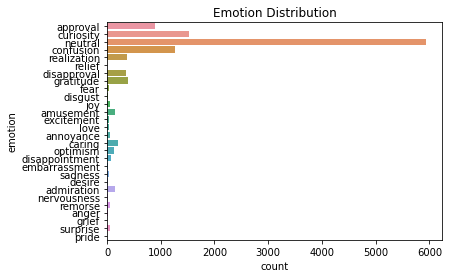

In [ ]:
sns.countplot(data = large_text, y = 'emotion').set_title("Emotion Distribution")